In [118]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
# load data

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "winequality-red.csv"


data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    file_path,
)

In [120]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
data.shape

(1599, 12)

# Understand the features of the dataset

| Feature           | Significance  |
| ----------------- | ------------- |
| Fixed acidity     | Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  |
| Volitile acidity  | The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  |
| Citric acid       |  Found in small quantities, citric acid can add 'freshness' and flavor to wines     |
| Residual sugar    |  it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. |
| Chlorides         |  The amount of salt in the wine. |
| Free sulphur dioxide | The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. |
| Total sulphur dioxide | Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. |
| Density           |  The density of water is close to that of water depending on the percent alcohol and sugar content. |
| pH                |  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.              |
| Sulphates         | Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. |
| Alcohol           | The percentage of alcohol contents in the wine.              |

In [122]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


# Understanding data statistics

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [124]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [125]:
# wine quality should be between 0-10, but as we can observe it's between 3-8...
# lets look at the distribution of it

data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Text(0, 0.5, 'Count')

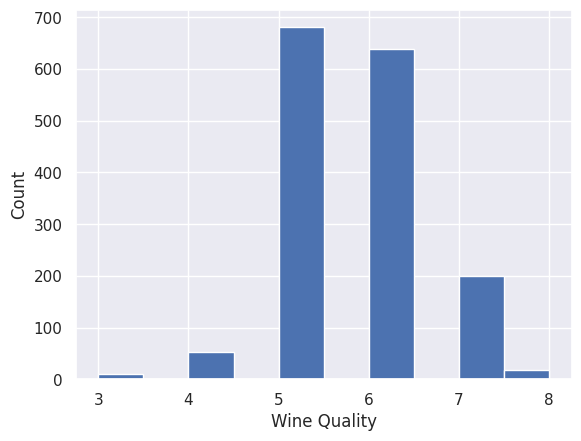

In [126]:
# visualizing the distribution
sns.set()

data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

# Splitting testing and training data

In [127]:
# import sklearn lib
from sklearn.model_selection import train_test_split

In [128]:
data.columns
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify=y)

In [130]:
y_test.value_counts()

,count
quality,
5,136
6,128
7,40
4,11
8,3
3,2


# Stratified Sampling
Stratified sampling is a probability sampling technique that divides a population into smaller, non-overlapping subgroups (strata) based on shared characteristics, and then randomly selects individuals from each stratum to form the sample.

* Data distribution may not be uniform in real world data.
* Random sampling - by its nature - introduces biases in such data sets.

Text(0, 0.5, 'Count')

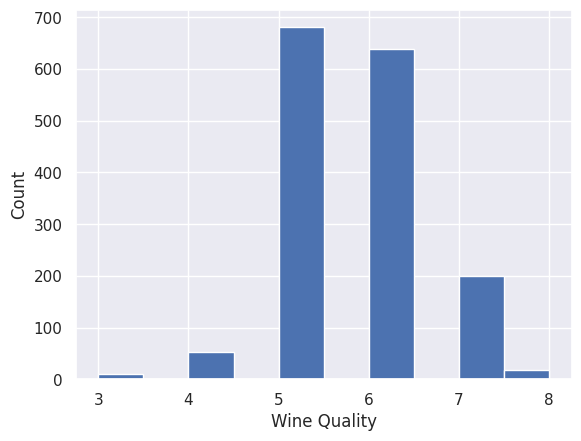

In [131]:
# why do we need stratified sampling in our data set
# look at the following visualization
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

# Many examples of class 5 and 6 compared to the other classes.
# This causes a problem while random sampling. The test distribution may not match with the overall distribution.

How do we sample in such cases?

* We divide the population into homogenous groups called strata.
* Data is sampled from each stratum so as to match it with the overall data distribution.
* Scikit-Learn provides a class StratifiedShuffleSplit that helps us in stratified sampling.

In [132]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(data, data['quality']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]
  print(strat_train_set.shape, strat_test_set.shape)

(1279, 12) (320, 12)


In [133]:
train_index, test_index= next(sss.split(data, data["quality"]))
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

In [134]:
strat_test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
475,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
329,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5,5
149,8.2,0.40,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6
827,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
356,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.0,5
1287,8.0,0.60,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5


In [135]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [136]:
overall_dist = data["quality"].value_counts() / len(data)

In [137]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [138]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


# Data Visualization

In [139]:
exploration_set = data.copy()

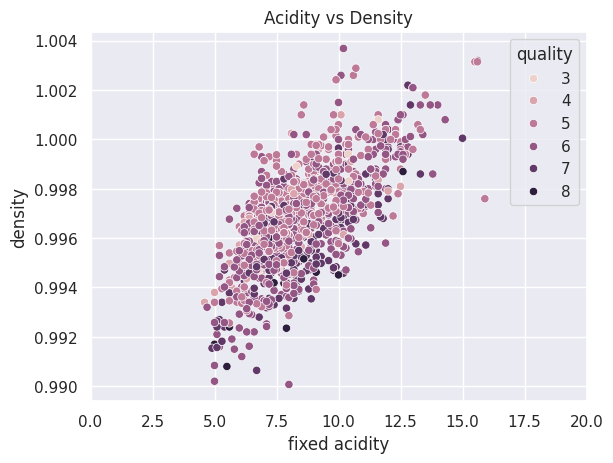

In [140]:
# Scatteer Visualization
plt.xlim([0,20])
plt.grid(True)
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

plt.title("Acidity vs Density")
plt.show()

#### Relationship between features

*  **Standard correlation coefficient** between features.
  *  Ranges between -1 to +1
    * **Correlation = +1**: Strong positive correlation between features
    * **Correlation = -1**: Strong negative correlation between features
    * **Correlation = 0**: No linear correlation between features
  * Visualization with heat map
* Only captures linear relationship between features.
  * For non-linear relationship, use **rank correlation**


In [141]:
corr_matrix = exploration_set.corr()

<Axes: >

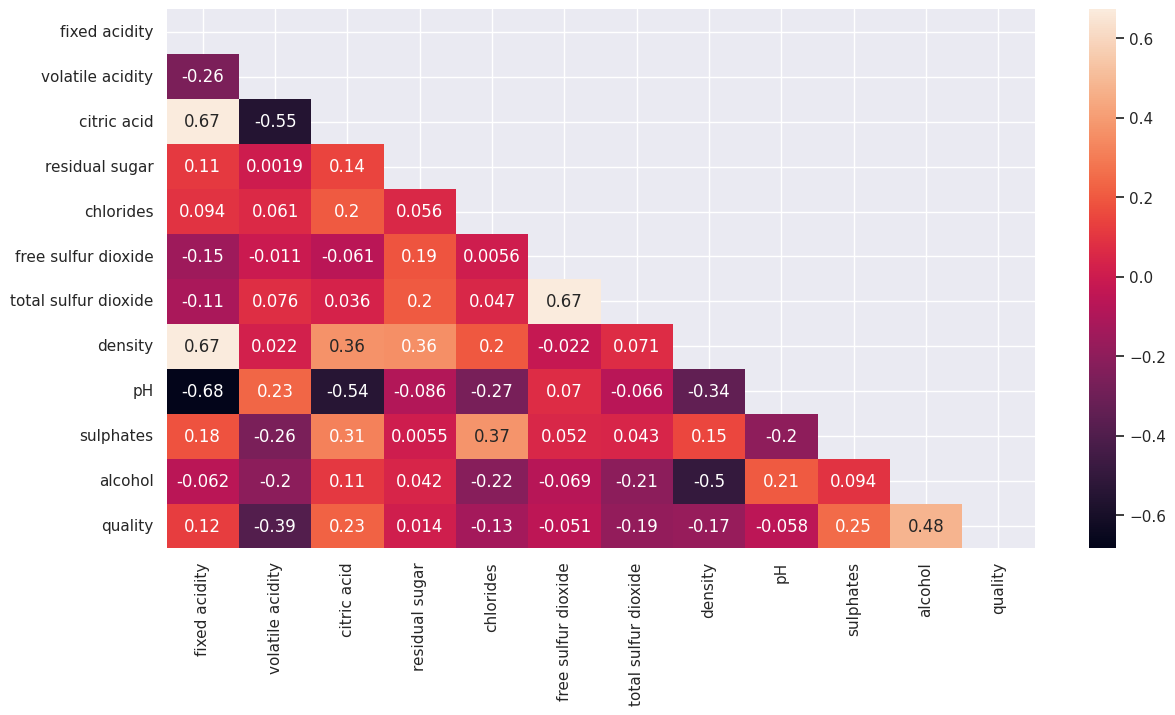

In [142]:
plt.figure(figsize=(14, 7))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot = True, mask = mask)

We can notice:
* Darker colors represent negative correlations, while fainter colors denotes positive correlations.  For example
  * `citric acid` and `fixed acidity` have strong positive correlation.
  * `pH` and `fixed acidity` have strong negative correlation.

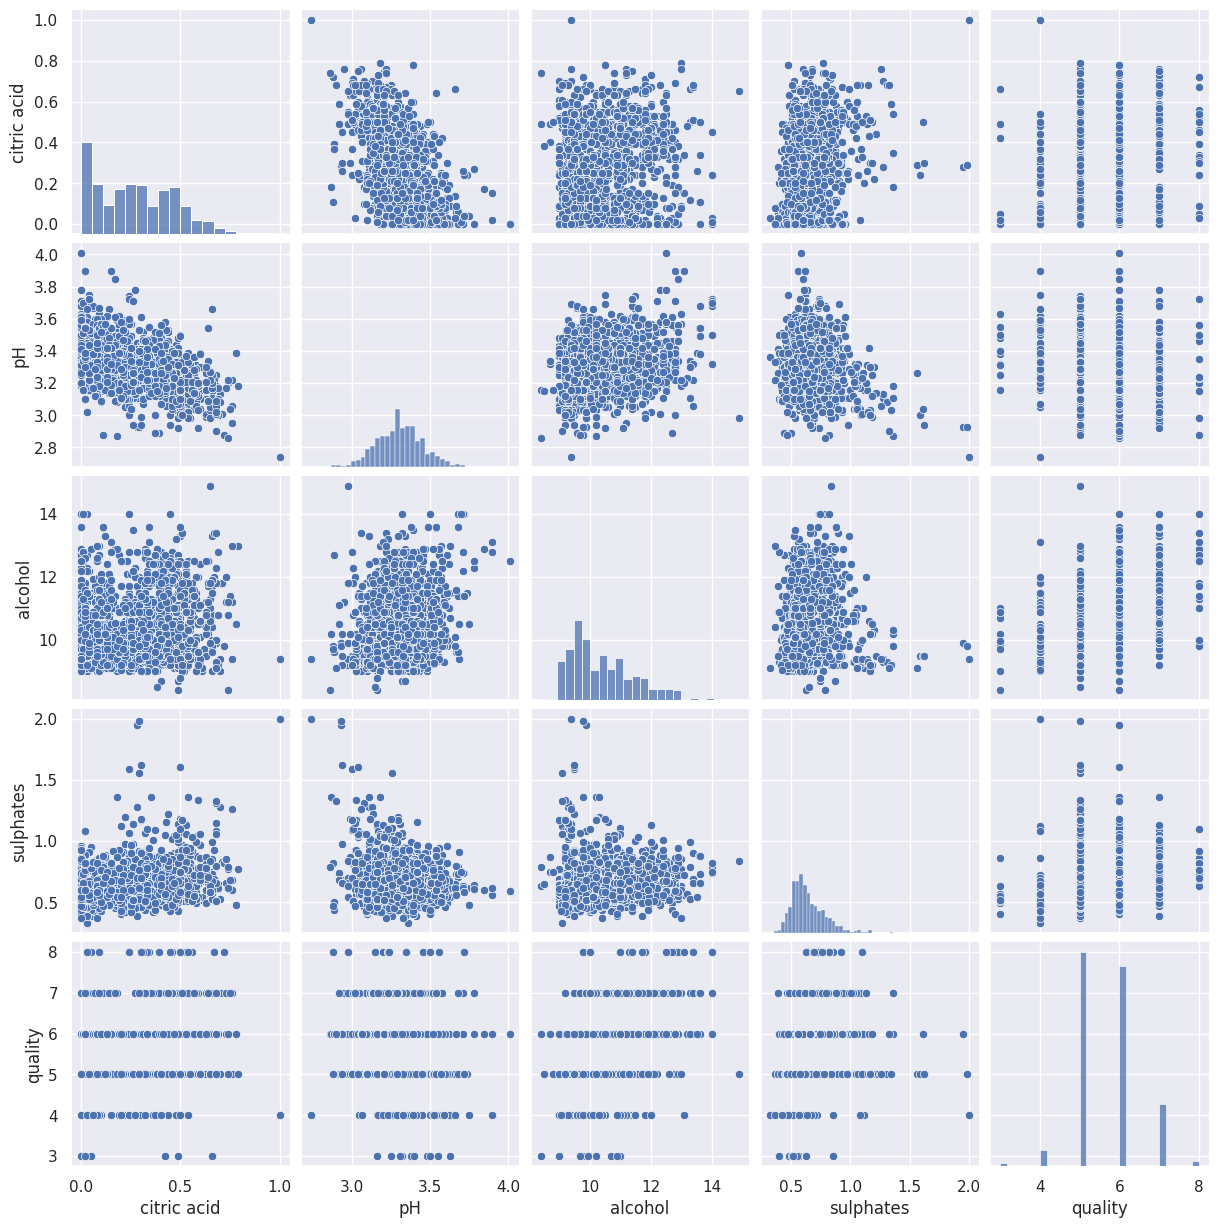

In [143]:
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
sns.pairplot(exploration_set[attribute_list])
plt.show()

# Preparing Data

In [175]:
wine_features = strat_train_set.drop("quality", axis=1)
wine_labels = strat_train_set['quality'].copy()

In [145]:
# checking NaN values
wine_features.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [146]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [147]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [148]:
tr_features = imputer.transform(wine_features)

#### Normalizing data

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

transform_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [150]:
wine_features_tr = transform_pipeline.fit_transform(wine_features)

In [151]:
# preparing the test data

wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

In [152]:
wine_features_test_tr = transform_pipeline.transform(wine_features_test)

# Selecting the ML model

In [160]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [161]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060277

In [162]:
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.40636065372564334

Text(0, 0.5, 'Predicted quality')

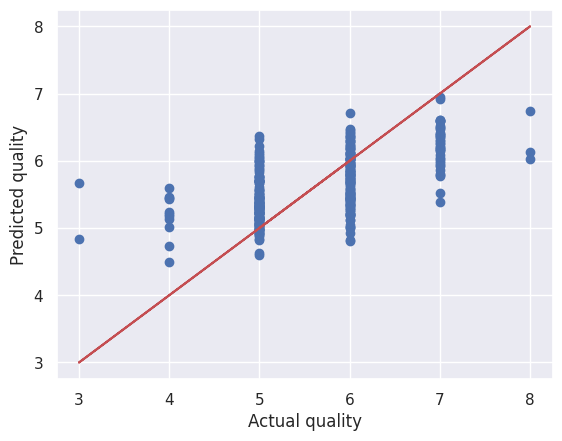

In [163]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

### Now lets try using DecisionTreeRegressor

In [164]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [166]:
quality_predictions =  tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [167]:
quality_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.40636065372564334

Text(0, 0.5, 'Predicted quality')

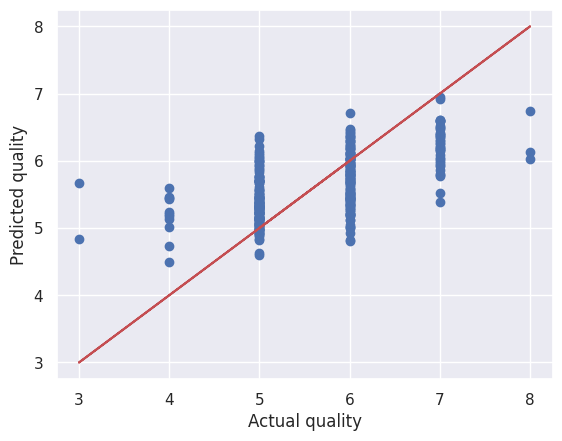

In [168]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [176]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,
                         scoring='neg_mean_squared_error', cv=10)
lin_reg_mse_scores = - scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413965


In [177]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6640625  0.5625     0.5859375  0.4140625  0.5390625
 0.546875   0.71875    0.8203125  1.03937008]
Mean: 0.6508120078740157
Standard deviation: 0.16642669293498016


#### Random Forest

In [178]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
                         scoring='neg_mean_squared_error', cv=10)
forest_mse_error = -scores
display_scores(forest_mse_error)

Scores: [0.39793125 0.42127109 0.28797969 0.31712578 0.22268594 0.29415859
 0.28123984 0.39336172 0.42973203 0.45755118]
Mean: 0.35030371186023623
Standard deviation: 0.07494202346443408


In [179]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3226140625

Text(0, 0.5, 'Predicted quality')

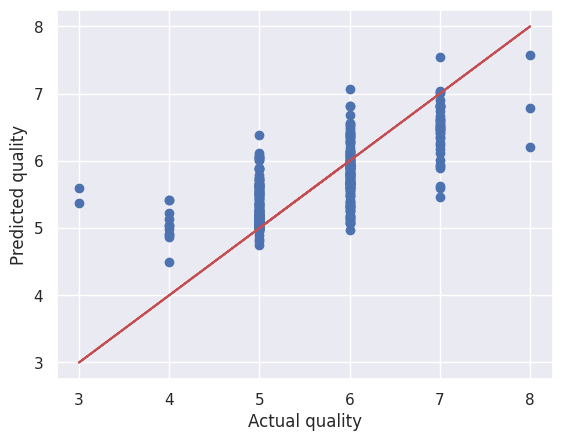

In [180]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

# Finetune model

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [183]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [185]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [186]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [188]:
cv_result = grid_search.cv_results_
for mean_score, params in zip(cv_result["mean_test_score"], cv_result["params"]):
  print(-mean_score, params)

0.4980041530501088 {'max_features': 2, 'n_estimators': 3}
0.3894445159313725 {'max_features': 2, 'n_estimators': 10}
0.3677337248093681 {'max_features': 2, 'n_estimators': 30}
0.4777008442265795 {'max_features': 4, 'n_estimators': 3}
0.3818822303921568 {'max_features': 4, 'n_estimators': 10}
0.36182123161764707 {'max_features': 4, 'n_estimators': 30}
0.4657240604575163 {'max_features': 6, 'n_estimators': 3}
0.39235186887254897 {'max_features': 6, 'n_estimators': 10}
0.3562228553921568 {'max_features': 6, 'n_estimators': 30}
0.4866237745098038 {'max_features': 8, 'n_estimators': 3}
0.3973636335784313 {'max_features': 8, 'n_estimators': 10}
0.3649842830882352 {'max_features': 8, 'n_estimators': 30}
0.4445258033769063 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.37160768995098037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4807839733115468 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3707552696078431 {'bootstrap': False, 'max_features': 3,

In [191]:
# evaluation on test set

wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.transform(wine_features_test)

quality_test_predictions = grid_search.best_estimator_.predict(
    wine_features_test_tr)

mean_squared_error(wine_labels_test, quality_test_predictions)

0.3259236111111111

In [192]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(np.float64(0.25572675827376157), np.float64(0.3961204639484607))